In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
def get_dataset():
    
    prev_dtype = {
        'SK_ID_PREV': np.uint32, 'SK_ID_CURR': np.uint32, 'HOUR_APPR_PROCESS_START': np.int32, 'NFLAG_LAST_APPL_IN_DAY': np.int32,
        'DAYS_DECISION': np.int32, 'SELLERPLACE_AREA': np.int32, 'AMT_ANNUITY': np.float32, 'AMT_APPLICATION': np.float32,
        'AMT_CREDIT': np.float32, 'AMT_DOWN_PAYMENT': np.float32, 'AMT_GOODS_PRICE': np.float32, 'RATE_DOWN_PAYMENT': np.float32,
        'RATE_INTEREST_PRIMARY': np.float32, 'RATE_INTEREST_PRIVILEGED': np.float32, 'CNT_PAYMENT': np.float32,
        'DAYS_FIRST_DRAWING': np.float32, 'DAYS_FIRST_DUE': np.float32, 'DAYS_LAST_DUE_1ST_VERSION': np.float32,
        'DAYS_LAST_DUE': np.float32, 'DAYS_TERMINATION': np.float32, 'NFLAG_INSURED_ON_APPROVAL': np.float32
    }
    
    bureau_dtype = {
        'SK_ID_CURR': np.uint32, 'SK_ID_BUREAU': np.uint32, 'DAYS_CREDIT': np.int32,'CREDIT_DAY_OVERDUE': np.int32,
        'CNT_CREDIT_PROLONG': np.int32, 'DAYS_CREDIT_UPDATE': np.int32, 'DAYS_CREDIT_ENDDATE': np.float32,
        'DAYS_ENDDATE_FACT': np.float32, 'AMT_CREDIT_MAX_OVERDUE': np.float32, 'AMT_CREDIT_SUM': np.float32,
        'AMT_CREDIT_SUM_DEBT': np.float32, 'AMT_CREDIT_SUM_LIMIT': np.float32, 'AMT_CREDIT_SUM_OVERDUE': np.float32,
        'AMT_ANNUITY': np.float32
    }
    
    bureau_bal_dtype = {
        'SK_ID_BUREAU': np.int32, 'MONTHS_BALANCE': np.int32,
    }
    
    pos_dtype = {
        'SK_ID_PREV': np.uint32, 'SK_ID_CURR': np.uint32, 'MONTHS_BALANCE': np.int32, 'SK_DPD': np.int32,
        'SK_DPD_DEF': np.int32, 'CNT_INSTALMENT': np.float32,'CNT_INSTALMENT_FUTURE': np.float32,
    }
    
    install_dtype = {
        'SK_ID_PREV': np.uint32, 'SK_ID_CURR': np.uint32, 'NUM_INSTALMENT_NUMBER': np.int32, 'NUM_INSTALMENT_VERSION': np.float32,
        'DAYS_INSTALMENT': np.float32, 'DAYS_ENTRY_PAYMENT': np.float32, 'AMT_INSTALMENT': np.float32, 'AMT_PAYMENT': np.float32,
    }
    
    card_dtype = {
        'SK_ID_PREV': np.uint32, 'SK_ID_CURR': np.uint32, 'MONTHS_BALANCE': np.int16,
        'AMT_CREDIT_LIMIT_ACTUAL': np.int32, 'CNT_DRAWINGS_CURRENT': np.int32, 'SK_DPD': np.int32,'SK_DPD_DEF': np.int32,
        'AMT_BALANCE': np.float32, 'AMT_DRAWINGS_ATM_CURRENT': np.float32, 'AMT_DRAWINGS_CURRENT': np.float32,
        'AMT_DRAWINGS_OTHER_CURRENT': np.float32, 'AMT_DRAWINGS_POS_CURRENT': np.float32, 'AMT_INST_MIN_REGULARITY': np.float32,
        'AMT_PAYMENT_CURRENT': np.float32, 'AMT_PAYMENT_TOTAL_CURRENT': np.float32, 'AMT_RECEIVABLE_PRINCIPAL': np.float32,
        'AMT_RECIVABLE': np.float32, 'AMT_TOTAL_RECEIVABLE': np.float32, 'CNT_DRAWINGS_ATM_CURRENT': np.float32,
        'CNT_DRAWINGS_OTHER_CURRENT': np.float32, 'CNT_DRAWINGS_POS_CURRENT': np.float32, 'CNT_INSTALMENT_MATURE_CUM': np.float32,
    }
    
    app_train = pd.read_csv('../data/home-credit-default-risk/application_train.csv')
    app_test = pd.read_csv('../data/home-credit-default-risk/application_test.csv')
    apps = pd.concat([app_train, app_test])
    prev = pd.read_csv('../data/home-credit-default-risk/previous_application.csv', dtype=prev_dtype)
    bureau = pd.read_csv('../data/home-credit-default-risk/bureau.csv', dtype=bureau_dtype)
    bureau_balance = pd.read_csv('../data/home-credit-default-risk/bureau_balance.csv', dtype=bureau_bal_dtype)
    pos_bal = pd.read_csv('../data/home-credit-default-risk/POS_CASH_balance.csv', dtype=pos_dtype)
    install = pd.read_csv('../data/home-credit-default-risk/installments_payments.csv', dtype=install_dtype)
    card_bal = pd.read_csv('../data/home-credit-default-risk/credit_card_balance.csv', dtype=card_dtype)
    
    return apps, prev, bureau, bureau_balance, pos_bal, install, card_bal

In [4]:
def get_apps_processed(apps):
    apps['APPS_EXT_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
    apps['APPS_EXT_SOURCE_STD'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
    apps['APPS_EXT_SOURCE_STD'] = apps['APPS_EXT_SOURCE_STD'].fillna(apps['APPS_EXT_SOURCE_STD'].mean())
    
    apps['APPS_ANNUITY_CREDIT_RATIO'] = apps['AMT_ANNUITY'] / apps['AMT_CREDIT']
    apps['APPS_GOODS_CREDIT_RATIO'] = apps['AMT_GOODS_PRICE'] / apps['AMT_CREDIT']
    apps['APPS_CREDIT_GOODS_DIFF'] = apps['AMT_CREDIT'] - apps['AMT_GOODS_PRICE']
    
    apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY'] / apps['AMT_INCOME_TOTAL']
    apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT'] / apps['AMT_INCOME_TOTAL']
    apps['APPS_GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE'] / apps['AMT_INCOME_TOTAL']
    apps['APPS_CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['CNT_FAM_MEMBERS']
    
    apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED'] / apps['DAYS_BIRTH']
    apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['DAYS_EMPLOYED']
    apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['DAYS_BIRTH']
    apps['APPS_CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_BIRTH']
    apps['APPS_CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_EMPLOYED']
    
    return apps


def get_prev_processed(prev):
    
    prev['PREV_CREDIT_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_CREDIT']
    prev['PREV_GOODS_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_GOODS_PRICE']
    prev['PREV_CREDIT_APPL_RATIO'] = prev['AMT_CREDIT'] / prev['AMT_APPLICATION']
    prev['PREV_ANNUITY_APPL_RATIO'] = prev['AMT_ANNUITY'] / prev['AMT_APPLICATION']
    prev['PREV_GOODS_APPL_RATIO'] = prev['AMT_GOODS_PRICE'] / prev['AMT_APPLICATION']
    
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

    prev['PREV_DAYS_LAST_DUE_DIFF'] = prev['DAYS_LAST_DUE_1ST_VERSION'] - prev['DAYS_LAST_DUE']
    
    all_pay = prev['AMT_ANNUITY'] * prev['CNT_PAYMENT']
    prev['PREV_INTERESTS_RATE'] = (all_pay / prev['AMT_CREDIT'] - 1) / prev['CNT_PAYMENT']
    
    return prev


def get_prev_amt_agg(prev):    

    agg_dict = {
         # 기존 컬럼. 
        'SK_ID_CURR':['count'],
        'AMT_CREDIT':['mean', 'max', 'sum'],
        'AMT_ANNUITY':['mean', 'max', 'sum'], 
        'AMT_APPLICATION':['mean', 'max', 'sum'],
        'AMT_DOWN_PAYMENT':['mean', 'max', 'sum'],
        'AMT_GOODS_PRICE':['mean', 'max', 'sum'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
        # 가공 컬럼
        'PREV_CREDIT_DIFF':['mean', 'max', 'sum'], 
        'PREV_CREDIT_APPL_RATIO':['mean', 'max'],
        'PREV_GOODS_DIFF':['mean', 'max', 'sum'],
        'PREV_GOODS_APPL_RATIO':['mean', 'max'],
        'PREV_DAYS_LAST_DUE_DIFF':['mean', 'max', 'sum'],
        'PREV_INTERESTS_RATE':['mean', 'max']
    }
    
    prev_group = prev.groupby('SK_ID_CURR')
    prev_amt_agg = prev_group.agg(agg_dict)
    prev_amt_agg.columns = ['PREV_' + ('_').join(column).upper() for column in prev_amt_agg.columns.ravel()]
    prev_amt_agg = prev_amt_agg.reset_index()
    
    return prev_amt_agg


def get_prev_refused_appr_agg(prev):

    prev_refused_appr_group = prev[prev['NAME_CONTRACT_STATUS'].isin(['Approved', 'Refused'])].groupby(['SK_ID_CURR', 'NAME_CONTRACT_STATUS'])
    prev_refused_appr_agg = prev_refused_appr_group['SK_ID_CURR'].count().unstack()
    prev_refused_appr_agg = prev_refused_appr_agg.fillna(0)
    prev_refused_appr_agg.columns = ['PREV_APPROVED_COUNT', 'PREV_REFUSED_COUNT']
    prev_refused_appr_agg = prev_refused_appr_agg.reset_index()
    
    return prev_refused_appr_agg


def get_prev_days365_agg(prev):
    cond_days365 = prev['DAYS_DECISION'] > -365
    prev_days365_group = prev[cond_days365].groupby('SK_ID_CURR')
    agg_dict = {
        'SK_ID_CURR':['count'],
        'AMT_CREDIT':['mean', 'max', 'sum'],
        'AMT_ANNUITY':['mean', 'max', 'sum'], 
        'AMT_APPLICATION':['mean', 'max', 'sum'],
        'AMT_DOWN_PAYMENT':['mean', 'max', 'sum'],
        'AMT_GOODS_PRICE':['mean', 'max', 'sum'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],

        'PREV_CREDIT_DIFF':['mean', 'max', 'sum'], 
        'PREV_CREDIT_APPL_RATIO':['mean', 'max'],
        'PREV_GOODS_DIFF':['mean', 'max', 'sum'],
        'PREV_GOODS_APPL_RATIO':['mean', 'max'],
        'PREV_DAYS_LAST_DUE_DIFF':['mean', 'max', 'sum'],
        'PREV_INTERESTS_RATE':['mean', 'max']
    }
    
    prev_days365_agg = prev_days365_group.agg(agg_dict)

    prev_days365_agg.columns = ["PREV_D365_"+ "_".join(x).upper() for x in prev_days365_agg.columns.ravel()]
    
    return prev_days365_agg


def get_prev_agg(prev):
    
    prev = get_prev_processed(prev)
    prev_amt_agg = get_prev_amt_agg(prev)
    prev_refused_appr_agg = get_prev_refused_appr_agg(prev)
    prev_days365_agg = get_prev_days365_agg(prev) # get_prev_days365_agg
    
    prev_agg = prev_amt_agg.merge(prev_refused_appr_agg, on='SK_ID_CURR', how='left')
    prev_agg = prev_agg.merge(prev_days365_agg, on='SK_ID_CURR', how='left') # leftjoin prev_days365_agg
    prev_agg['PREV_REFUSED_RATIO'] = prev_agg['PREV_REFUSED_COUNT'] / prev_agg['PREV_SK_ID_CURR_COUNT']
    prev_agg['PREV_APPROVED_RATIO'] = prev_agg['PREV_APPROVED_COUNT'] / prev_agg['PREV_SK_ID_CURR_COUNT']
    prev_agg = prev_agg.drop(['PREV_REFUSED_COUNT', 'PREV_APPROVED_COUNT'], axis=1)
    
    return prev_agg


def get_apps_all_with_prev_agg(apps, prev):

    apps_all = get_apps_processed(apps)
    prev_agg = get_prev_agg(prev)
    print('prev_agg shape:', prev_agg.shape)
    print('apps_all before merge shape:', apps_all.shape)
    apps_all = apps_all.merge(prev_agg, on='SK_ID_CURR', how='left')
    print('apps_all after merge with prev_agg shape:', apps_all.shape)
    
    return apps_all


bureau_agg_dict = {
    'SK_ID_BUREAU': ['count'],
    'DAYS_CREDIT': ['min', 'max', 'mean'],
    'CREDIT_DAY_OVERDUE': ['min', 'max', 'mean'],
    'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
    'DAYS_ENDDATE_FACT': ['min', 'max', 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['max', 'mean', 'sum'],
    'AMT_ANNUITY': ['max', 'mean', 'sum'],

    'BUREAU_ENDDATE_FACT_DIFF': ['min', 'max', 'mean'],
    'BUREAU_CREDIT_FACT_DIFF': ['min', 'max', 'mean'],
    'BUREAU_CREDIT_ENDDATE_DIFF': ['min', 'max', 'mean'],
    'BUREAU_CREDIT_DEBT_RATIO': ['min', 'max', 'mean'],
    'BUREAU_CREDIT_DEBT_DIFF': ['min', 'max', 'mean'],
    'BUREAU_IS_DPD': ['mean', 'sum'],
    'BUREAU_IS_DPD_OVER120': ['mean', 'sum'],
}

bureau_bal_agg_dict = {
    'SK_ID_CURR': ['count'],
    'MONTHS_BALANCE': ['min', 'max', 'mean'],
    'BUREAU_BAL_IS_DPD': ['mean', 'sum'],
    'BUREAU_BAL_IS_DPD_OVER120': ['mean', 'sum'],
}

def get_bureau_processed(bureau):
    
    bureau['BUREAU_ENDDATE_FACT_DIFF'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_ENDDATE_FACT']
    bureau['BUREAU_CREDIT_FACT_DIFF'] = bureau['DAYS_CREDIT'] - bureau['DAYS_ENDDATE_FACT']
    bureau['BUREAU_CREDIT_ENDDATE_DIFF'] = bureau['DAYS_CREDIT'] - bureau['DAYS_CREDIT_ENDDATE']

    bureau['BUREAU_CREDIT_DEBT_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / bureau['AMT_CREDIT_SUM']
    bureau['BUREAU_CREDIT_DEBT_DIFF'] = bureau['AMT_CREDIT_SUM_DEBT'] - bureau['AMT_CREDIT_SUM']\
    
    bureau['BUREAU_IS_DPD'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 0 else 0)
    bureau['BUREAU_IS_DPD_OVER120'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 120 else 0)
    
    return bureau


def get_bureau_day_amt_agg(bureau):     

    bureau_grp = bureau.groupby('SK_ID_CURR')
    bureau_day_amt_agg = bureau_grp.agg(bureau_agg_dict)
    bureau_day_amt_agg.columns = ['BUREAU_' + ('_').join(column).upper() for column in bureau_day_amt_agg.columns.ravel()]
    bureau_day_amt_agg = bureau_day_amt_agg.reset_index()
    
    return bureau_day_amt_agg


def get_bureau_active_agg(bureau):
    
    cond_active = bureau['CREDIT_ACTIVE'] == 'Active'
    bureau_active_grp = bureau[cond_active].groupby('SK_ID_CURR')
    bureau_active_agg = bureau_active_grp.agg(bureau_agg_dict)
    bureau_active_agg.columns = ['BUREAU_ACT_' + ('_').join(column).upper() for column in bureau_active_agg.columns.ravel()]
    bureau_active_agg = bureau_active_agg.reset_index()
    
    return bureau_active_agg


def get_bureau_days750_agg(bureau):
    cond_days750 = bureau['DAYS_CREDIT'] > -750
    bureau_days750_group = bureau[cond_days750].groupby('SK_ID_CURR')
    bureau_agg_dict = {
        'SK_ID_BUREAU':['count'],
        'DAYS_CREDIT':['min', 'max', 'mean'],
        'CREDIT_DAY_OVERDUE':['min', 'max', 'mean'],
        'DAYS_CREDIT_ENDDATE':['min', 'max', 'mean'],
        'DAYS_ENDDATE_FACT':['min', 'max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['max', 'mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean', 'sum'],

        'BUREAU_ENDDATE_FACT_DIFF':['min', 'max', 'mean'],
        'BUREAU_CREDIT_FACT_DIFF':['min', 'max', 'mean'],
        'BUREAU_CREDIT_ENDDATE_DIFF':['min', 'max', 'mean'],
        'BUREAU_CREDIT_DEBT_RATIO':['min', 'max', 'mean'],
        'BUREAU_CREDIT_DEBT_DIFF':['min', 'max', 'mean'],
        'BUREAU_IS_DPD':['mean', 'sum'],
        'BUREAU_IS_DPD_OVER120':['mean', 'sum']
        }

    bureau_days750_agg = bureau_days750_group.agg(bureau_agg_dict)
    bureau_days750_agg.columns = ['BUREAU_ACT_'+('_').join(column).upper() for column in bureau_days750_agg.columns.ravel()]
    bureau_days750_agg = bureau_days750_agg.reset_index()
    
    return bureau_days750_agg


def get_bureau_bal_agg(bureau, bureau_bal):
    
    bureau_bal = bureau_bal.merge(bureau[['SK_ID_CURR', 'SK_ID_BUREAU']], on='SK_ID_BUREAU', how='left')
    bureau_bal['BUREAU_BAL_IS_DPD'] = bureau_bal['STATUS'].apply(lambda x: 1 if x in ['1', '2', '3', '4', '5'] else 0)
    bureau_bal['BUREAU_BAL_IS_DPD_OVER120'] = bureau_bal['STATUS'].apply(lambda x: 1 if x == '5' else 0)
    bureau_bal_grp = bureau_bal.groupby('SK_ID_CURR')
    bureau_bal_agg = bureau_bal_grp.agg(bureau_bal_agg_dict)
    bureau_bal_agg.columns = ['BUREAU_BAL_' + ('_').join(column).upper() for column in bureau_bal_agg.columns.ravel()]
    bureau_bal_agg = bureau_bal_agg.reset_index()
    
    return bureau_bal_agg


def get_bureau_agg(bureau, bureau_bal):
    
    bureau = get_bureau_processed(bureau)
    bureau_day_amt_agg = get_bureau_day_amt_agg(bureau)
    bureau_active_agg = get_bureau_active_agg(bureau)
    bureau_days750_agg = get_bureau_days750_agg(bureau) # get_bureau_days750_agg
    bureau_bal_agg = get_bureau_bal_agg(bureau, bureau_bal)
    bureau_agg = bureau_day_amt_agg.merge(bureau_active_agg, on='SK_ID_CURR', how='left')
    
    bureau_agg['BUREAU_ACT_IS_DPD_RATIO'] = bureau_agg['BUREAU_ACT_BUREAU_IS_DPD_SUM'] / bureau_agg['BUREAU_SK_ID_BUREAU_COUNT']
    bureau_agg['BUREAU_ACT_IS_DPD_OVER120_RATIO'] = bureau_agg['BUREAU_ACT_BUREAU_IS_DPD_OVER120_SUM'] / bureau_agg['BUREAU_SK_ID_BUREAU_COUNT']
    
    bureau_agg = bureau_agg.merge(bureau_bal_agg, on='SK_ID_CURR', how='left')
    bureau_agg = bureau_agg.merge(bureau_days750_agg, on='SK_ID_CURR', how='left') # leftjoin bureau_days750_agg
    print(f'bureau_agg shape: {bureau_agg.shape}')
    
    return bureau_agg


def get_pos_bal_agg(pos_ball):
    
    pos_bal['POS_IS_DPD'] = pos_bal['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
    pos_bal['POS_IS_DPD_UNDER_120'] = pos_bal['SK_DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
    pos_bal['POS_IS_DPD_OVER_120'] = pos_bal['SK_DPD'].apply(lambda x: 1 if x >= 120 else 0)

    pos_bal_grp = pos_bal.groupby('SK_ID_CURR')
    pos_bal_agg_dict = {
        'SK_ID_CURR': ['count'], 
        'MONTHS_BALANCE': ['min', 'mean', 'max'], 
        'SK_DPD': ['min', 'max', 'mean'],

        'POS_IS_DPD': ['mean', 'sum'],
        'POS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'POS_IS_DPD_OVER_120': ['mean', 'sum'],
    }

    pos_bal_agg = pos_bal_grp.agg(pos_bal_agg_dict)
    pos_bal_agg.columns = [('POS_') + ('_').join(column).upper() for column in pos_bal_agg.columns.ravel()]

    cond_months = pos_bal['MONTHS_BALANCE'] > -20
    pos_bal_m20_grp = pos_bal[cond_months].groupby('SK_ID_CURR')
    pos_bal_agg_dict = {
        'SK_ID_CURR': ['count'], 
        'MONTHS_BALANCE': ['min', 'mean', 'max'], 
        'SK_DPD': ['min', 'max', 'mean'],

        'POS_IS_DPD': ['mean', 'sum'],
        'POS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'POS_IS_DPD_OVER_120': ['mean', 'sum'],
    }

    pos_bal_m20_agg = pos_bal_m20_grp.agg(pos_bal_agg_dict)
    pos_bal_m20_agg.columns = [('POS_M20')+('_').join(column).upper() for column in pos_bal_m20_agg.columns.ravel()]

    pos_bal_agg = pos_bal_agg.merge(pos_bal_m20_agg, on='SK_ID_CURR', how='left')
    pos_bal_agg = pos_bal_agg.reset_index()
    
    return pos_bal_agg


def get_install_agg(install):

    install['AMT_DIFF'] = install['AMT_INSTALMENT'] - install['AMT_PAYMENT']
    install['AMT_RATIO'] = (install['AMT_PAYMENT'] + 1) / (install['AMT_INSTALMENT'] + 1)

    install['SK_DPD'] = install['DAYS_ENTRY_PAYMENT'] - install['DAYS_INSTALMENT']
    
    install['INS_IS_DPD'] = install['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
    install['INS_IS_DPD_UNDER_120'] = install['SK_DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
    install['INS_IS_DPD_OVER_120'] = install['SK_DPD'].apply(lambda x: 1 if x >= 120 else 0)

    install_grp = install.groupby('SK_ID_CURR')
    install_agg_dict = {
        'SK_ID_CURR': ['count'],
        'NUM_INSTALMENT_VERSION': ['nunique'], 
        'DAYS_ENTRY_PAYMENT': ['mean', 'max', 'sum'],
        'DAYS_INSTALMENT': ['mean', 'max', 'sum'],
        'AMT_INSTALMENT': ['mean', 'max', 'sum'],
        'AMT_PAYMENT': ['mean', 'max','sum'],

        'AMT_DIFF': ['mean','min', 'max','sum'],
        'AMT_RATIO':[ 'mean', 'max'],
        'SK_DPD': ['mean', 'min', 'max'],
        'INS_IS_DPD': ['mean', 'sum'],
        'INS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'INS_IS_DPD_OVER_120': ['mean', 'sum'],
    }

    install_agg = install_grp.agg(install_agg_dict)
    install_agg.columns = [('INS_') + ('_').join(column).upper() for column in install_agg.columns.ravel()]

    cond_day = install['DAYS_ENTRY_PAYMENT'] >= -365
    install_d365_grp = install[cond_day].groupby('SK_ID_CURR')
    install_agg_dict = {
        'SK_ID_CURR': ['count'],
        'NUM_INSTALMENT_VERSION': ['nunique'], 
        'DAYS_ENTRY_PAYMENT': ['mean', 'max', 'sum'],
        'DAYS_INSTALMENT': ['mean', 'max', 'sum'],
        'AMT_INSTALMENT': ['mean', 'max', 'sum'],
        'AMT_PAYMENT': ['mean', 'max','sum'],

        'AMT_DIFF': ['mean','min', 'max','sum'],
        'AMT_RATIO':[ 'mean', 'max'],
        'SK_DPD': ['mean', 'min', 'max'],
        'INS_IS_DPD': ['mean', 'sum'],
        'INS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'INS_IS_DPD_OVER_120': ['mean', 'sum'],
    }

    install_d365_agg = install_d365_grp.agg(install_agg_dict)
    install_d365_agg.columns = [('INS_d365')+('_').join(column).upper() for column in install_d365_agg. columns.ravel()]

    install_agg = install_agg.merge(install_d365_agg, on='SK_ID_CURR', how='left')
    install_agg = install_agg.reset_index()
    
    return install_agg


def get_card_bal_agg(card_bal):

    card_bal['BALANCE_LIMIT_RATIO'] = card_bal['AMT_BALANCE'] / card_bal['AMT_CREDIT_LIMIT_ACTUAL']
    card_bal['DRAWING_LIMIT_RATIO'] = card_bal['AMT_DRAWINGS_CURRENT'] / card_bal['AMT_CREDIT_LIMIT_ACTUAL']

    card_bal['CARD_IS_DPD'] = card_bal['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
    card_bal['CARD_IS_DPD_UNDER_120'] = card_bal['SK_DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
    card_bal['CARD_IS_DPD_OVER_120'] = card_bal['SK_DPD'].apply(lambda x: 1 if x >= 120 else 0)

    card_bal_grp = card_bal.groupby('SK_ID_CURR')
    card_bal_agg_dict = {
        'SK_ID_CURR': ['count'],
        'AMT_BALANCE': ['max'],
        'AMT_CREDIT_LIMIT_ACTUAL': ['max'],
        'AMT_DRAWINGS_ATM_CURRENT': ['max', 'sum'],
        'AMT_DRAWINGS_CURRENT': ['max', 'sum'],
        'AMT_DRAWINGS_POS_CURRENT': ['max', 'sum'],
        'AMT_INST_MIN_REGULARITY': ['max', 'mean'],
        'AMT_PAYMENT_TOTAL_CURRENT': ['max','sum'],
        'AMT_TOTAL_RECEIVABLE': ['max', 'mean'],
        'CNT_DRAWINGS_ATM_CURRENT': ['max','sum'],
        'CNT_DRAWINGS_CURRENT': ['max', 'mean', 'sum'],
        'CNT_DRAWINGS_POS_CURRENT': ['mean'],
        'SK_DPD': ['mean', 'max', 'sum'],

        'BALANCE_LIMIT_RATIO': ['min','max'],
        'DRAWING_LIMIT_RATIO': ['min', 'max'],
        'CARD_IS_DPD': ['mean', 'sum'],
        'CARD_IS_DPD_UNDER_120': ['mean', 'sum'],
        'CARD_IS_DPD_OVER_120': ['mean', 'sum'],
    }

    card_bal_agg = card_bal_grp.agg(card_bal_agg_dict)
    card_bal_agg.columns = [('CARD_') + ('_').join(column).upper() for column in card_bal_agg.columns.ravel()]
    
    card_bal_agg = card_bal_agg.reset_index()

    cond_month = card_bal['MONTHS_BALANCE'] >= -3
    card_bal_m3_grp = card_bal[cond_month].groupby('SK_ID_CURR')

    card_bal_m3_agg = card_bal_m3_grp.agg(card_bal_agg_dict)
    card_bal_m3_agg.columns = ['CARD_M3'+('_').join(column).upper() for column in card_bal_m3_agg.  columns.ravel()]

    card_bal_agg = card_bal_agg.merge(card_bal_m3_agg, on='SK_ID_CURR', how='left')
    card_bal_agg = card_bal_agg.reset_index()
    
    return card_bal_agg


def get_apps_all_with_all_agg(apps, prev, bureau, bureau_bal, pos_bal, install, card_bal):
    
    apps_all = get_apps_processed(apps)
    prev_agg = get_prev_agg(prev)
    bureau_agg = get_bureau_agg(bureau, bureau_bal)
    pos_bal_agg = get_pos_bal_agg(pos_bal)
    install_agg = get_install_agg(install)
    card_bal_agg = get_card_bal_agg(card_bal)
    
    print(f'prev_agg shape: {prev_agg.shape}\nbureau_agg shape: {bureau_agg.shape}')
    print(f'pos_bal_agg shape: {pos_bal_agg.shape}\ninstall_agg shape: {install_agg.shape}\ncard_bal_agg shape: {card_bal_agg.shape}')
    print(f'apps_all before merge shape: {apps_all.shape}')
    
    apps_all = apps_all.merge(prev_agg, on='SK_ID_CURR', how='left')
    apps_all = apps_all.merge(bureau_agg, on='SK_ID_CURR', how='left')
    apps_all = apps_all.merge(pos_bal_agg, on='SK_ID_CURR', how='left')
    apps_all = apps_all.merge(install_agg, on='SK_ID_CURR', how='left')
    apps_all = apps_all.merge(card_bal_agg, on='SK_ID_CURR', how='left')
    
    print(f'apps_all after merge with all shape: {apps_all.shape}')
    
    return apps_all

In [5]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

def get_apps_all_encoded(apps_all):
    
    object_columns = apps_all.dtypes[apps_all.dtypes == 'object'].index.tolist()
    for column in object_columns:
        apps_all[column] = pd.factorize(apps_all[column])[0]
    
    return apps_all


def get_apps_all_train_test(apps_all):

    apps_all_train = apps_all[~apps_all['TARGET'].isnull()]
    apps_all_test = apps_all[apps_all['TARGET'].isnull()]
    apps_all_test = apps_all_test.drop('TARGET', axis=1)
    
    return apps_all_train, apps_all_test

In [6]:
apps, prev, bureau, bureau_balance, pos_bal, install, card_bal = get_dataset()

apps_all = get_apps_all_with_all_agg(apps, prev, bureau, bureau_balance, pos_bal, install, card_bal)
apps_all = get_apps_all_encoded(apps_all)
apps_all_train, apps_all_test = get_apps_all_train_test(apps_all)
print(f'apps_all_train.shape: {apps_all_train.shape}, apps_all_test.shape: {apps_all_test.shape}')

bureau_agg shape: (305811, 149)
prev_agg shape: (338857, 81)
bureau_agg shape: (305811, 149)
pos_bal_agg shape: (337252, 27)
install_agg shape: (339587, 59)
card_bal_agg shape: (103558, 70)
apps_all before merge shape: (356255, 136)
apps_all after merge with all shape: (356255, 517)
apps_all_train.shape: (307511, 517), apps_all_test.shape: (48744, 516)


In [7]:
ftr_app = apps_all_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = apps_all_train['TARGET']
train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=0)

In [8]:
bayesian_params = {
    'max_depth': (6, 16),
    'num_leaves': (24, 64),
    'min_child_samples': (10, 200),
    'min_child_weight': (1, 50),
    'subsample': (0.5, 1),
    'colsample_bytree': (0.5, 1),
    'max_bin': (10, 500),
    'reg_lambda': (0.001, 10),
    'reg_alpha': (0.01, 50),
}

In [9]:
def lgb_roc_eval(max_depth, num_leaves, min_child_samples, min_child_weight, subsample,
                colsample_bytree, max_bin, reg_lambda, reg_alpha):
    
    params = {
        "num_iterations": 1000, 
        "learning_rate": 0.01,
        'max_depth': int(round(max_depth)),
        'num_leaves': int(round(num_leaves)),
        'min_child_samples': int(round(min_child_samples)),
        'min_child_weight': int(round(min_child_weight)),
        'subsample': max(min(subsample, 1), 0),
        'colsample_bytree': max(min(colsample_bytree, 1), 0),
        'max_bin': max(int(round(max_bin)), 10),
        'reg_lambda': max(reg_lambda, 0),
        'reg_alpha': max(reg_alpha, 0),
    }
    print(params)
    
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
                  eval_metric='auc', verbose=100, early_stopping_rounds= 100)
    valid_proba = lgb_model.predict_proba(valid_x)[:, 1]
    roc_auc = roc_auc_score(valid_y, valid_proba)
    
    return roc_auc

In [10]:
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score

lgbBO = BayesianOptimization(f=lgb_roc_eval, pbounds=bayesian_params, random_state=0)
lgbBO.maximize(init_points=5, n_iter=25)
print(lgbBO.res)

|   iter    |  target   | colsam... |  max_bin  | max_depth | min_ch... | min_ch... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
{'num_iterations': 1000, 'learning_rate': 0.01, 'max_depth': 12, 'num_leaves': 50, 'min_child_samples': 114, 'min_child_weight': 22, 'subsample': 0.9818313802505146, 'colsample_bytree': 0.7744067519636624, 'max_bin': 360, 'reg_lambda': 8.917838234820016, 'reg_alpha': 21.884984691022}
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.771445	training's binary_logloss: 0.252483	valid_1's auc: 0.754249	valid_1's binary_logloss: 0.251797
[200]	training's auc: 0.785573	training's binary_logloss: 0.242864	valid_1's auc: 0.764781	valid_1's binary_logloss: 0.244397
[300]	training's auc: 0.797465	training's binary_logloss: 0.237135	valid_1's auc: 0.77324	valid_1's binary_logloss: 0.240542
[400]	tr

Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.766031	training's binary_logloss: 0.253604	valid_1's auc: 0.751183	valid_1's binary_logloss: 0.25242
[200]	training's auc: 0.780363	training's binary_logloss: 0.244537	valid_1's auc: 0.762644	valid_1's binary_logloss: 0.245147
[300]	training's auc: 0.791459	training's binary_logloss: 0.239243	valid_1's auc: 0.771027	valid_1's binary_logloss: 0.241373
[400]	training's auc: 0.799637	training's binary_logloss: 0.235536	valid_1's auc: 0.776397	valid_1's binary_logloss: 0.239102
[500]	training's auc: 0.805853	training's binary_logloss: 0.232734	valid_1's auc: 0.780181	valid_1's binary_logloss: 0.237603
[600]	training's auc: 0.810928	training's binary_logloss: 0.230449	valid_1's auc: 0.782944	valid_1's binary_logloss: 0.23652
[700]	training's auc: 0.815414	training's binary_logloss: 0.228476	valid_1's auc: 0.78503	valid_1's binary_logloss: 0.235731
[800]	training's auc: 0.819619	training's binary_logloss: 0

[200]	training's auc: 0.779583	training's binary_logloss: 0.244985	valid_1's auc: 0.76142	valid_1's binary_logloss: 0.245575
[300]	training's auc: 0.790388	training's binary_logloss: 0.239793	valid_1's auc: 0.769627	valid_1's binary_logloss: 0.241873
[400]	training's auc: 0.798857	training's binary_logloss: 0.236025	valid_1's auc: 0.775411	valid_1's binary_logloss: 0.239521
[500]	training's auc: 0.80519	training's binary_logloss: 0.233197	valid_1's auc: 0.779263	valid_1's binary_logloss: 0.238003
[600]	training's auc: 0.81033	training's binary_logloss: 0.23091	valid_1's auc: 0.782038	valid_1's binary_logloss: 0.236925
[700]	training's auc: 0.814712	training's binary_logloss: 0.228981	valid_1's auc: 0.784069	valid_1's binary_logloss: 0.236146
[800]	training's auc: 0.818759	training's binary_logloss: 0.227238	valid_1's auc: 0.785651	valid_1's binary_logloss: 0.235541
[900]	training's auc: 0.822612	training's binary_logloss: 0.225636	valid_1's auc: 0.786958	valid_1's binary_logloss: 0.235

[400]	training's auc: 0.806496	training's binary_logloss: 0.232817	valid_1's auc: 0.779585	valid_1's binary_logloss: 0.237847
[500]	training's auc: 0.813402	training's binary_logloss: 0.229666	valid_1's auc: 0.78306	valid_1's binary_logloss: 0.236386
[600]	training's auc: 0.819279	training's binary_logloss: 0.227042	valid_1's auc: 0.785674	valid_1's binary_logloss: 0.235376
[700]	training's auc: 0.824592	training's binary_logloss: 0.224734	valid_1's auc: 0.787653	valid_1's binary_logloss: 0.234628
[800]	training's auc: 0.829558	training's binary_logloss: 0.222605	valid_1's auc: 0.789268	valid_1's binary_logloss: 0.234035
[900]	training's auc: 0.834199	training's binary_logloss: 0.220629	valid_1's auc: 0.790546	valid_1's binary_logloss: 0.233577
[1000]	training's auc: 0.83863	training's binary_logloss: 0.218773	valid_1's auc: 0.791533	valid_1's binary_logloss: 0.233226
Did not meet early stopping. Best iteration is:
[1000]	training's auc: 0.83863	training's binary_logloss: 0.218773	vali

[600]	training's auc: 0.81226	training's binary_logloss: 0.230384	valid_1's auc: 0.783347	valid_1's binary_logloss: 0.236506
[700]	training's auc: 0.816164	training's binary_logloss: 0.228578	valid_1's auc: 0.785347	valid_1's binary_logloss: 0.235722
[800]	training's auc: 0.819683	training's binary_logloss: 0.226994	valid_1's auc: 0.786868	valid_1's binary_logloss: 0.235125
[900]	training's auc: 0.8229	training's binary_logloss: 0.225589	valid_1's auc: 0.788154	valid_1's binary_logloss: 0.234652
[1000]	training's auc: 0.825849	training's binary_logloss: 0.22432	valid_1's auc: 0.789209	valid_1's binary_logloss: 0.234263
Did not meet early stopping. Best iteration is:
[1000]	training's auc: 0.825849	training's binary_logloss: 0.22432	valid_1's auc: 0.789209	valid_1's binary_logloss: 0.234263
|  17       |  0.7892   |  0.6417   |  489.7    |  6.743    |  83.95    |  40.39    |  60.88    |  37.27    |  3.529    |  0.8155   |
{'num_iterations': 1000, 'learning_rate': 0.01, 'max_depth': 12, 

[800]	training's auc: 0.832535	training's binary_logloss: 0.22237	valid_1's auc: 0.788211	valid_1's binary_logloss: 0.234535
[900]	training's auc: 0.836475	training's binary_logloss: 0.220642	valid_1's auc: 0.789362	valid_1's binary_logloss: 0.234101
[1000]	training's auc: 0.839983	training's binary_logloss: 0.219083	valid_1's auc: 0.790315	valid_1's binary_logloss: 0.233748
Did not meet early stopping. Best iteration is:
[1000]	training's auc: 0.839983	training's binary_logloss: 0.219083	valid_1's auc: 0.790315	valid_1's binary_logloss: 0.233748
|  21       |  0.7903   |  0.5      |  362.9    |  6.0      |  200.0    |  1.0      |  64.0     |  0.01     |  10.0     |  0.7921   |
{'num_iterations': 1000, 'learning_rate': 0.01, 'max_depth': 15, 'num_leaves': 25, 'min_child_samples': 200, 'min_child_weight': 43, 'subsample': 0.7688482694108841, 'colsample_bytree': 0.7055050631086612, 'max_bin': 139, 'reg_lambda': 9.47992034959786, 'reg_alpha': 8.980281518814927}
Training until validation s

[1000]	training's auc: 0.871453	training's binary_logloss: 0.205048	valid_1's auc: 0.793759	valid_1's binary_logloss: 0.232419
Did not meet early stopping. Best iteration is:
[1000]	training's auc: 0.871453	training's binary_logloss: 0.205048	valid_1's auc: 0.793759	valid_1's binary_logloss: 0.232419
|  25       |  0.7938   |  0.8324   |  498.3    |  14.93    |  127.5    |  11.69    |  61.63    |  2.217    |  5.131    |  0.6893   |
{'num_iterations': 1000, 'learning_rate': 0.01, 'max_depth': 16, 'num_leaves': 64, 'min_child_samples': 122, 'min_child_weight': 17, 'subsample': 0.5, 'colsample_bytree': 0.5, 'max_bin': 468, 'reg_lambda': 6.897287939012561, 'reg_alpha': 0.01}
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.78448	training's binary_logloss: 0.249951	valid_1's auc: 0.762501	valid_1's binary_logloss: 0.250529
[200]	training's auc: 0.801075	training's binary_logloss: 0.238399	valid_1's auc: 0.772438	valid_1's binary_logloss: 0.242471
[300]	t

|  29       |  0.7893   |  0.891    |  383.6    |  12.33    |  10.44    |  47.23    |  44.68    |  37.53    |  8.275    |  0.8288   |
{'num_iterations': 1000, 'learning_rate': 0.01, 'max_depth': 12, 'num_leaves': 35, 'min_child_samples': 20, 'min_child_weight': 3, 'subsample': 0.9081272960223892, 'colsample_bytree': 0.8893409080501363, 'max_bin': 441, 'reg_lambda': 9.620815627640294, 'reg_alpha': 0.3933116113060613}
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.765962	training's binary_logloss: 0.252526	valid_1's auc: 0.752814	valid_1's binary_logloss: 0.251338
[200]	training's auc: 0.782123	training's binary_logloss: 0.243226	valid_1's auc: 0.764647	valid_1's binary_logloss: 0.244061
[300]	training's auc: 0.794775	training's binary_logloss: 0.237557	valid_1's auc: 0.773599	valid_1's binary_logloss: 0.240189
[400]	training's auc: 0.804206	training's binary_logloss: 0.233449	valid_1's auc: 0.779457	valid_1's binary_logloss: 0.237812
[500]	training

In [11]:
target_list = []
for result in lgbBO.res:
    target = result['target']
    target_list.append(target)
print(target_list)
print(f'maximum target index: {np.argmax(np.array(target_list))}')

[0.7909860266380109, 0.7906784065352481, 0.7932440862269432, 0.7899938832166079, 0.7890741066502354, 0.7936987279773176, 0.7924956530790987, 0.7935110288537484, 0.7881579063901742, 0.7902449145694387, 0.7931882066413853, 0.7931296267760958, 0.7915331309080853, 0.7935123781913921, 0.7931053467207309, 0.7933303957028104, 0.789209457570118, 0.7939053547301167, 0.7913561895834471, 0.7865588337846421, 0.7903152213180074, 0.7898548757681998, 0.7906905249029328, 0.789692972899845, 0.7937591978779748, 0.794104320261455, 0.79438773411329, 0.7931303198960268, 0.7892903135398603, 0.7920538821807785]
maximum target index: 26


In [12]:
max_dict = lgbBO.res[np.argmax(np.array(target_list))]
print(max_dict)

{'target': 0.79438773411329, 'params': {'colsample_bytree': 0.5, 'max_bin': 482.7969417898795, 'max_depth': 16.0, 'min_child_samples': 148.15579298103472, 'min_child_weight': 19.882189245215557, 'num_leaves': 64.0, 'reg_alpha': 0.01, 'reg_lambda': 10.0, 'subsample': 1.0}}


In [13]:
from sklearn.model_selection import KFold

def train_apps_all_with_oof(apps_all_train, apps_all_test, nfolds=5):
    ftr_app = apps_all_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
    target_app = apps_all_train['TARGET']
    
    folds = KFold(n_splits=nfolds, shuffle=True, random_state=0)
    oof_preds = np.zeros(ftr_app.shape[0])
    test_preds = np.zeros(apps_all_test.shape[0])

    clf = LGBMClassifier(
        n_jobs=-1,
        n_estimators=4000, 
        learning_rate=0.01, 
        max_depth=round(max_dict['params']['max_depth']),
        num_leaves=round(max_dict['params']['num_leaves']),
        colsample_bytree=round(max_dict['params']['colsample_bytree'], 3),
        subsample=round(max_dict['params']['subsample'], 3),
        max_bin=round(max_dict['params']['max_bin']),
        reg_alpha=round(max_dict['params']['reg_alpha'], 3),
        reg_lambda=round(max_dict['params']['reg_lambda'], 3),
        min_child_weight=round(max_dict['params']['min_child_weight']),
        min_child_samples=round(max_dict['params']['min_child_samples']),
        silent=-1,
        verbose=-1,        
    )    

    for fold_idx, (train_idx, valid_idx) in enumerate(folds.split(ftr_app)):
        
        print(f'##### iteration {fold_idx} start')
        train_x = ftr_app.iloc[train_idx, :]
        train_y = target_app.iloc[train_idx]
        valid_x = ftr_app.iloc[valid_idx, :]
        valid_y = target_app.iloc[valid_idx]
        
        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
                eval_metric='auc', verbose=200, early_stopping_rounds=200)
        test_preds += clf.predict_proba(
            apps_all_test.drop('SK_ID_CURR', axis=1), num_iteration=clf.best_iteration_
        )[:, 1] / folds.n_splits
        
    return clf, test_preds

In [14]:
clf, test_preds = train_apps_all_with_oof(apps_all_train, apps_all_test, nfolds=5)

##### iteration 0 start
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.797736	training's binary_logloss: 0.239371	valid_1's auc: 0.77218	valid_1's binary_logloss: 0.241418
[400]	training's auc: 0.819761	training's binary_logloss: 0.227864	valid_1's auc: 0.783844	valid_1's binary_logloss: 0.235287
[600]	training's auc: 0.836617	training's binary_logloss: 0.220207	valid_1's auc: 0.790276	valid_1's binary_logloss: 0.232643
[800]	training's auc: 0.850757	training's binary_logloss: 0.214031	valid_1's auc: 0.793446	valid_1's binary_logloss: 0.231401
[1000]	training's auc: 0.863025	training's binary_logloss: 0.208628	valid_1's auc: 0.795274	valid_1's binary_logloss: 0.230701
[1200]	training's auc: 0.873632	training's binary_logloss: 0.203894	valid_1's auc: 0.796253	valid_1's binary_logloss: 0.230323
[1400]	training's auc: 0.883063	training's binary_logloss: 0.199528	valid_1's auc: 0.796908	valid_1's binary_logloss: 0.230086
[1600]	training's auc: 0.89176

[800]	training's auc: 0.85206	training's binary_logloss: 0.212362	valid_1's auc: 0.79046	valid_1's binary_logloss: 0.238104
[1000]	training's auc: 0.8642	training's binary_logloss: 0.206947	valid_1's auc: 0.792018	valid_1's binary_logloss: 0.237493
[1200]	training's auc: 0.874908	training's binary_logloss: 0.202175	valid_1's auc: 0.792993	valid_1's binary_logloss: 0.237155
[1400]	training's auc: 0.884505	training's binary_logloss: 0.197746	valid_1's auc: 0.793594	valid_1's binary_logloss: 0.236952
[1600]	training's auc: 0.893166	training's binary_logloss: 0.193654	valid_1's auc: 0.794149	valid_1's binary_logloss: 0.236783
[1800]	training's auc: 0.900909	training's binary_logloss: 0.18981	valid_1's auc: 0.794321	valid_1's binary_logloss: 0.236723
[2000]	training's auc: 0.908169	training's binary_logloss: 0.186091	valid_1's auc: 0.794457	valid_1's binary_logloss: 0.236666
[2200]	training's auc: 0.915097	training's binary_logloss: 0.182426	valid_1's auc: 0.794641	valid_1's binary_logloss:

In [15]:
apps_all_test['TARGET'] = test_preds
apps_all_test[['SK_ID_CURR', 'TARGET']].to_csv('../result/out_of_prediction_result_03.csv', index=False)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

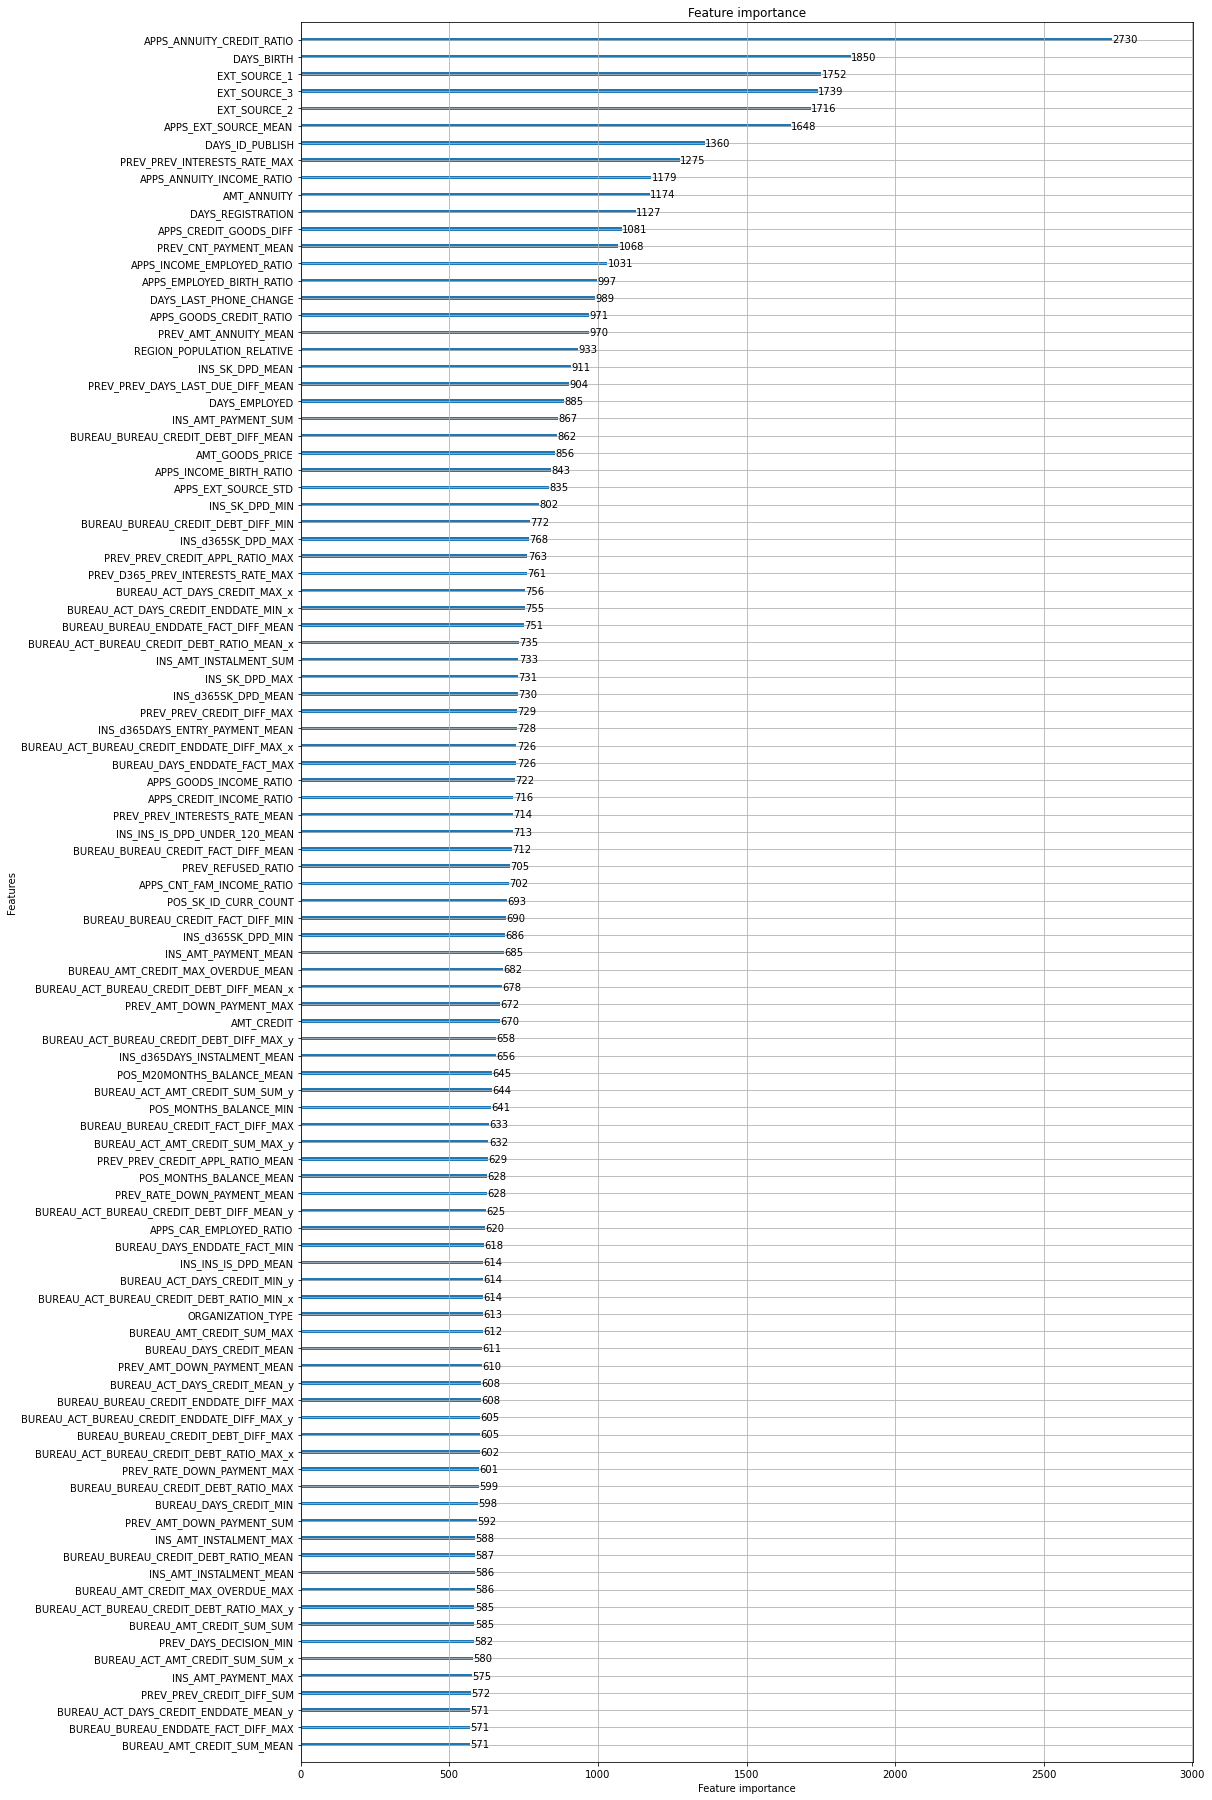

In [16]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32), max_num_features=100)